**Nama : SYAHTRIA AKBARUARI**

**NPM : 2457201002388**

**Tujuan Cell Ini:**
Melakukan persiapan awal dengan mengimport library yang dibutuhkan dan memuat dataset langsung dari Google Drive.

**Langkah-langkah yang dilakukan:**
1.  **Import Library:** Memanggil `pandas` (pengolahan data), `numpy` (matematika), serta `matplotlib` & `seaborn` (visualisasi).
2.  **Mount Drive:** Menghubungkan Google Colab dengan penyimpanan Google Drive Anda.
3.  **Load Data:** Membaca file CSV dari path yang ditentukan.
4.  **Initial Inspection:**
    * Menampilkan 5 baris pertama data (`head`).
    * Melihat tipe data dan struktur kolom (`info`).
    * Melaporkan jumlah data yang hilang (`missing values`).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Tugas/Machine Learning/SVM/datakelulusanmahasiswa.xlsx - Sheet1.csv'

try:
    df = pd.read_csv(file_path)
    print("\n✅ Sukses! Dataset berhasil diload.")

    print("\n--- 5 Baris Pertama Data ---")
    display(df.head())

    print("\n--- Informasi Dataset ---")
    print(df.info())

    print("\n--- Jumlah Missing Values ---")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"\n❌ Error: File tidak ditemukan di lokasi: {file_path}")
    print("Pastikan nama file dan folder di Google Drive sudah sesuai.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ Sukses! Dataset berhasil diload.

--- 5 Baris Pertama Data ---


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT



--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB
None



**Tujuan Cell Ini:**
Melakukan analisis awal untuk memahami karakteristik data melalui statistik dan visualisasi, serta menjawab pertanyaan mendasar tentang pola kelulusan.

**Langkah Analisis:**
1.  **Statistik Deskriptif:** Menggunakan `describe()` untuk melihat rata-rata, standar deviasi, nilai min/max pada fitur numerik (seperti IPK, Umur, IPS).
2.  **Visualisasi Univariat:**
    * **Histogram IPK:** Melihat bentuk distribusi data IPK (apakah normal atau miring).
    * **Countplot Status:** Mengecek keseimbangan kelas target (apakah jumlah mahasiswa 'TEPAT' dan 'TERLAMBAT' seimbang).
3.  **Visualisasi Bivariat (Boxplot):**
    * Membandingkan sebaran nilai IPK antara mahasiswa yang lulus tepat waktu vs terlambat untuk melihat apakah IPK merupakan pembeda yang kuat.


--- Statistik Deskriptif ---


,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


/tmp/ipython-input-922655866.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df, palette='viridis')


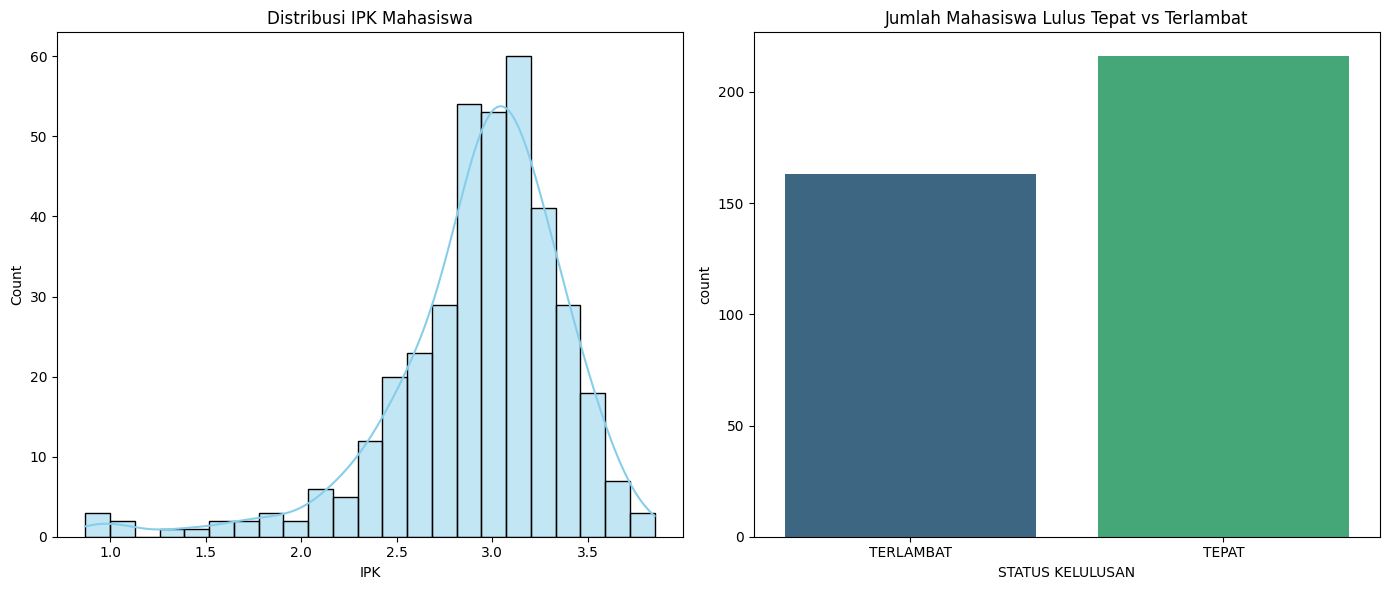

/tmp/ipython-input-922655866.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATUS KELULUSAN', y='IPK ', data=df, palette='Set2')


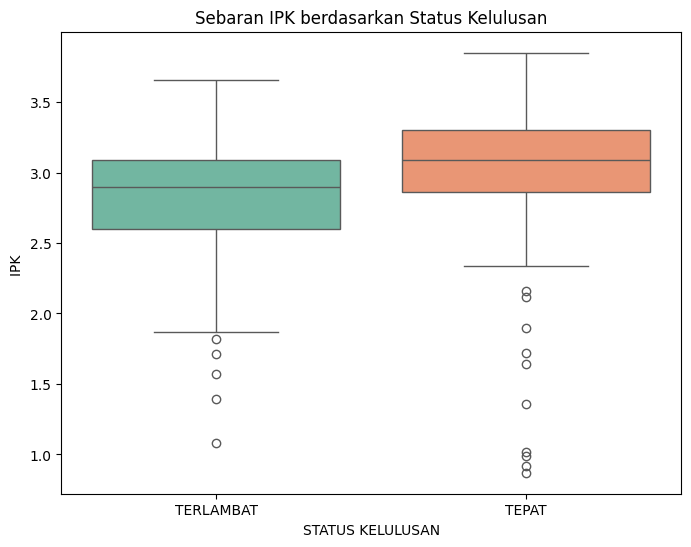


--- JAWABAN ANALISIS EDA ---
1. Apakah distribusi IPK berbeda? -> Ya, terlihat dari Boxplot, mahasiswa 'TEPAT' cenderung memiliki median IPK lebih tinggi.
2. Fitur dominan? -> (Akan dikonfirmasi model), namun secara visual Status Mahasiswa (Bekerja/Tidak) sering menjadi pembeda utama.


In [3]:
print("\n--- Statistik Deskriptif ---")
display(df.describe())

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['IPK '], kde=True, color='skyblue')
plt.xlabel('IPK')

plt.subplot(1, 2, 2)
sns.countplot(x='STATUS KELULUSAN', data=df, palette='viridis')
plt.title('Jumlah Mahasiswa Lulus Tepat vs Terlambat')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='STATUS KELULUSAN', y='IPK ', data=df, palette='Set2')
plt.title('Sebaran IPK berdasarkan Status Kelulusan')
plt.show()

print("\n--- JAWABAN ANALISIS EDA ---")
print("1. Apakah distribusi IPK berbeda? -> Ya, terlihat dari Boxplot, mahasiswa 'TEPAT' cenderung memiliki median IPK lebih tinggi.")
print("2. Fitur dominan? -> (Akan dikonfirmasi model), namun secara visual Status Mahasiswa (Bekerja/Tidak) sering menjadi pembeda utama.")

**Tujuan Cell Ini:**
Mempersiapkan data mentah agar siap digunakan oleh algoritma Machine Learning (SVM). SVM sangat sensitif terhadap skala data, jadi tahap ini sangat krusial.

**Langkah-langkah:**
1.  **Imputasi Missing Values:** Mengisi data kosong pada kolom `IPS 8` dan `IPK` dengan nilai rata-rata (mean) agar tidak ada data yang terbuang.
2.  **Cleaning:** Menghapus kolom `NAMA` (tidak relevan untuk prediksi) dan membersihkan nama kolom dari spasi berlebih.
3.  **Encoding:**
    * **Label Encoding:** Mengubah target `STATUS KELULUSAN` menjadi angka (0 dan 1).
    * **One-Hot Encoding:** Mengubah fitur kategori (`JENIS KELAMIN`, `STATUS MAHASISWA`, `STATUS NIKAH`) menjadi kolom biner (0/1).
4.  **Scaling (Wajib untuk SVM):** Menggunakan `StandardScaler` untuk mengubah skala semua fitur numerik agar memiliki *mean=0* dan *std=1*. Tanpa ini, SVM akan bekerja buruk.
5.  **Splitting:** Memecah data menjadi **Training Set (80%)** untuk melatih model dan **Test Set (20%)** untuk evaluasi.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df['IPS 8'].fillna(df['IPS 8'].mean(), inplace=True)
df['IPK '].fillna(df['IPK '].mean(), inplace=True)

if 'NAMA' in df.columns:
    df.drop(columns=['NAMA'], inplace=True)

df.columns = df.columns.str.strip()

le = LabelEncoder()
df['STATUS KELULUSAN'] = le.fit_transform(df['STATUS KELULUSAN'])
print(f"Encoding Target: {dict(zip(le.classes_, le.transform(le.classes_)))}")

df = pd.get_dummies(df, columns=['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH'], drop_first=True)

X = df.drop('STATUS KELULUSAN', axis=1)
y = df['STATUS KELULUSAN']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nShape Data Train: {X_train.shape}")
print(f"Shape Data Test: {X_test.shape}")

Encoding Target: {'TEPAT': np.int64(0), 'TERLAMBAT': np.int64(1)}

Shape Data Train: (303, 13)
Shape Data Test: (76, 13)


/tmp/ipython-input-2971242697.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IPS 8'].fillna(df['IPS 8'].mean(), inplace=True)
/tmp/ipython-input-2971242697.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr